In [1]:
import numpy as np
from tqdm import tqdm, trange
import matplotlib.pyplot as plt

from utils import UKF, PF, PPF
from utils import StateSpaceModel, MPCTrajectory, track_example1

In [2]:
x_points, y_points, line_segments = track_example1()

system = StateSpaceModel()

Ns = [2, 5, 10, 20, 50, 100, 200, 500, 1000]

In [17]:
trajectory = MPCTrajectory(x_points, y_points, line_segments, noise_dist=dist_type, savepath=f"output/track_L1_{dist_type}.pkl")
states, measurements = trajectory.get_data()

parzen_particle_filter = PPF(system.f, system.h, system.F_jacobian, system.Q, system.R, N)
            state_estimates, _, _, _ = parzen_particle_filter.filter(measurements, verbose=False)


In [19]:
import numpy as np
from tqdm import tqdm

# Define the number of repeats
num_repeats = 5

# Define the distribution types
distribution_types = ['mvn', 'mvt']

# Lists to store MSE values
MSEs_PF_repeat = []
MSEs_PPF_repeat = []
MSEs_UKF_repeat = []

# Perform repeats
for repeat in trange(num_repeats):
    # Lists to store MSE values for each repeat
    MSEs_PF = []
    MSEs_PPF = []
    MSEs_UKF = []

    # Perform computations for each distribution type
    for dist_type in distribution_types:

        trajectory = MPCTrajectory(x_points, y_points, line_segments, noise_dist=dist_type, savepath=f"output/track_L1_{dist_type}.pkl")
        states, measurements = trajectory.get_data()

        for N in Ns:
            particle_filter = PF(f=system.f, h=system.h, Q=system.Q, R=system.R, dim_m = 4, dim_y = 2, N=N)
            state_estimates, _, _, _ = particle_filter.filter(measurements, verbose=False)
            MSEs_PF.append(np.mean((states - state_estimates) ** 2))

            parzen_particle_filter = PPF(system.f, system.h, system.F_jacobian, system.Q, system.R, dim_m = 4, dim_y = 2, N=N)
            state_estimates, _, _, _ = parzen_particle_filter.filter(measurements, verbose=False)
            MSEs_PPF.append(np.mean((states - state_estimates) ** 2))

    # Append the MSE values for each repeat to the repeat-level lists
    MSEs_PF_repeat.append(MSEs_PF)
    MSEs_UKF_repeat.append(MSEs_UKF)

    unscent_kalman_filter = UKF(system.f, system.h, system.Q, system.R)
    state_estimates, _ = unscent_kalman_filter.filter(measurements, verbose=False)
    MSEs_UKF.append(np.mean((states - state_estimates) ** 2))
    

# Convert the repeat-level lists to arrays
MSEs_PF_repeat = np.array(MSEs_PF_repeat)
MSEs_PPF_repeat = np.array(MSEs_PPF_repeat)
MSEs_UKF_repeat = np.array(MSEs_UKF_repeat)


  0%|          | 0/5 [00:09<?, ?it/s]


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 5 is different from 4)

NameError: name 'MSEs' is not defined

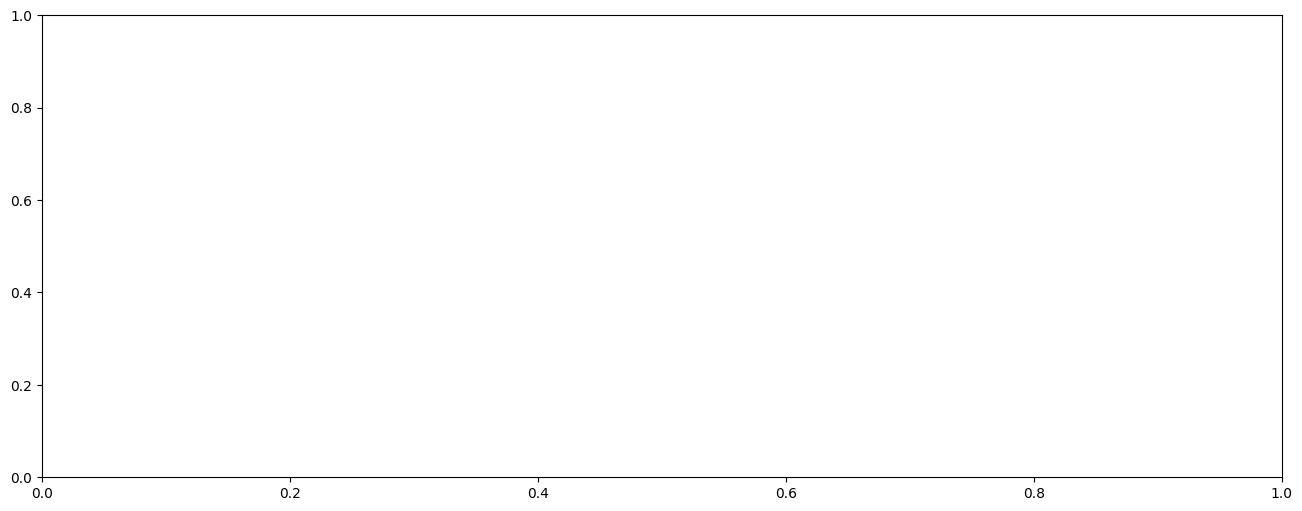

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(16, 6))

ax.plot(Ns, MSEs)
ax.set_xlabel("Number of particles")
ax.set_ylabel("MSE")
ax.set_title("MSE vs. number of particles")

ax.hlines(MSE_UKF, 2, 1000, color='k', linestyle='solid', linewidth=1)

ax.set_xscale('log')

plt.show()


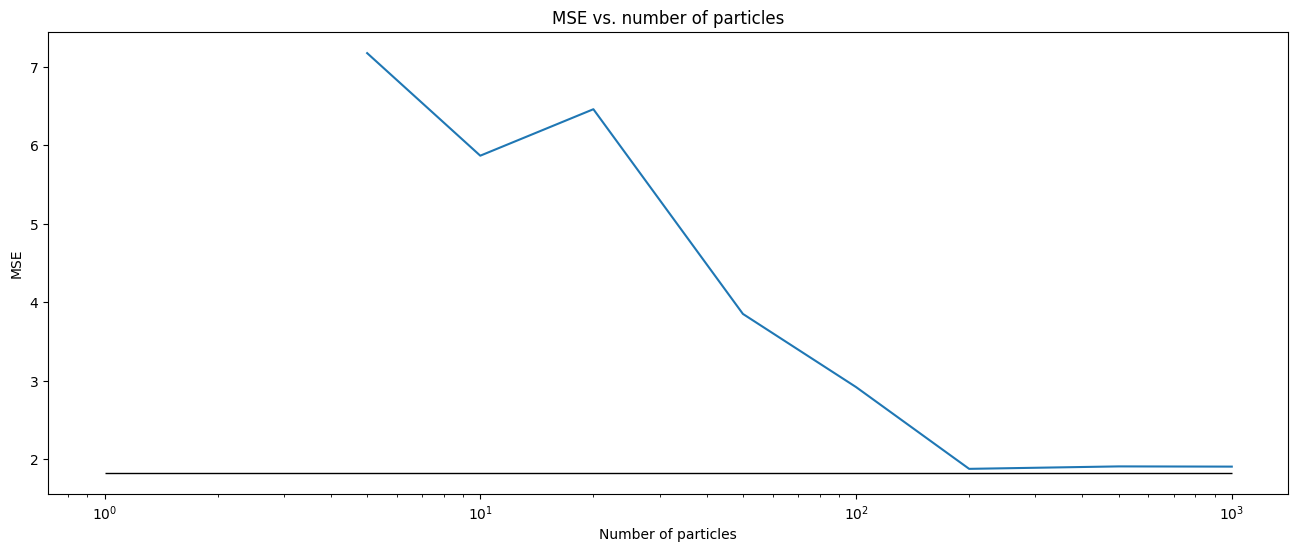

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(16, 6))

ax.plot(Ns, MSEs)
ax.set_xlabel("Number of particles")
ax.set_ylabel("MSE")
ax.set_title("MSE vs. number of particles")

ax.hlines(MSE_UKF, 1, 1000, color='k', linestyle='solid', linewidth=1)

ax.set_xscale('log')

plt.show()
